# Lab 3: Training Tokenizers

![](../figs/deep_nlp/lab/tokenize.png)


## Prepare the environment


```python
%pip install --pre ekorpkit[tokenize]
```

In [1]:
%config InlineBackend.figure_format='retina'
%load_ext autotime
%load_ext autoreload
%autoreload 2

from ekorpkit import eKonf

eKonf.setLogger("INFO")
print("version:", eKonf.__version__)

is_colab = eKonf.is_colab()
print("is colab?", is_colab)
if is_colab:
    eKonf.mount_google_drive()
workspace_dir = "/content/drive/MyDrive/workspace"
project_name = "ekorpkit-book"
project_dir = eKonf.set_workspace(workspace=workspace_dir, project=project_name)
print("project_dir:", project_dir)

INFO:ekorpkit.utils.notebook:Google Colab not detected.
INFO:ekorpkit.base:Setting EKORPKIT_WORKSPACE_ROOT to /content/drive/MyDrive/workspace
INFO:ekorpkit.base:Setting EKORPKIT_PROJECT to ekorpkit-book
INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env


version: 0.1.40.post0.dev20
is colab? False
project_dir: /content/drive/MyDrive/workspace/projects/ekorpkit-book
time: 1.48 s (started: 2022-11-15 06:47:14 +00:00)


### Load the saved corpora


In [20]:
data = eKonf.load_data("enko_filtered.parquet", project_dir + "/data")
data.head()


INFO:ekorpkit.io.file:Processing [1] files from ['enko_filtered.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/content/drive/MyDrive/workspace/projects/ekorpkit-book/data/enko_filtered.parquet']
INFO:ekorpkit.io.file:Loading data from /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/enko_filtered.parquet


,id,text,split,filename,corpus,num_chars,num_words,num_sents,avg_num_chars,avg_num_words
1,7644961,Anaissini is a tribe of click beetles in the f...,train,wiki_49,enwiki_sampled,63,11,1,5.727273,11.000000
2,6658552,The Vicky Metcalf Award for Literature for You...,train,wiki_24,enwiki_sampled,479,82,5,5.841463,16.400000
4,11081255,Eylex Films Pvt is a chain of multiplex and si...,train,wiki_94,enwiki_sampled,1161,181,12,6.414365,15.083333
8,4706486,Željko Zečević (; born 21 October 1963) is a S...,train,wiki_02,enwiki_sampled,1151,201,15,5.726368,13.400000
12,2170359,Gilberto Nascimento Silva (born 9 June 1956) i...,train,wiki_57,enwiki_sampled,685,105,9,6.523810,11.666667


time: 3.05 s (started: 2022-11-15 06:55:39 +00:00)


### Covert pandas datafame to huggingface dataset


In [21]:
from datasets import Dataset

text_column = "text"
data = data[data.corpus == "kowiki"]
raw_dataset = Dataset.from_pandas(data[[text_column]])
raw_dataset


Dataset({
    features: ['text', '__index_level_0__'],
    num_rows: 412646
})

time: 859 ms (started: 2022-11-15 06:55:51 +00:00)


### Shuffle the dataset


In [22]:
# shuffle the dataset

raw_dataset = raw_dataset.shuffle(seed=42)


time: 93.7 ms (started: 2022-11-15 06:55:54 +00:00)


### Split the dataset into sentences for training

The sentencepiece module comes with a python training API, which uses sentences in a file, one sentence per line. We will use the `sent_tokenize` function from the `nltk` package to split the text into sentences. The `sent_tokenize` function is a wrapper around the `punkt` tokenizer, which is a pre-trained sentence tokenizer. The `punkt` tokenizer is trained on the Penn Treebank corpus, which is a collection of Wall Street Journal articles. The `punkt` tokenizer is a good choice for plain English text, but it may not be the best choice for other languages.


In [23]:
import nltk
from nltk.tokenize import sent_tokenize
from ekorpkit.tokenizers.trainers.spm import export_sentence_chunk_files

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

time: 22.3 ms (started: 2022-11-15 06:55:56 +00:00)


In [24]:
output_dir = project_dir + "/data/tokenizers/ko_filtered_chunk"

export_sentence_chunk_files(
    raw_dataset,
    output_dir=output_dir,
    chunk_size=10000,
    text_column=text_column,
    sent_tokenize=sent_tokenize,
)


INFO:ekorpkit.tokenizers.trainers.spm:Writing sentence chunks to /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/tokenizers/ko_filtered_chunk


  0%|          | 0/42 [00:00<?, ?it/s]

sent_chunk_0000.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0001.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0002.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0003.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0004.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0005.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0006.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0007.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0008.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0009.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0010.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0011.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0012.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0013.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0014.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0015.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0016.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0017.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0018.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0019.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0020.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0021.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0022.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0023.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0024.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0025.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0026.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0027.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0028.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0029.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0030.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0031.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0032.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0033.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0034.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0035.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0036.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0037.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0038.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0039.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0040.txt:   0%|          | 0/10000 [00:00<?, ?it/s]

sent_chunk_0041.txt:   0%|          | 0/2646 [00:00<?, ?it/s]

time: 1min 1s (started: 2022-11-15 06:55:57 +00:00)


### Sample sentences and combine them into a single file

If your dataset is too large, you can sample a subset of the sentence files for training. The `sample` function from the `random` module can be used to sample a subset of the files.

You can use `sample_and_combine` function to sample a subset of sentence files and combine them into a single file.


In [25]:
from ekorpkit.tokenizers.trainers.spm import sample_and_combine

input_dir = project_dir + "/data/tokenizers/ko_filtered_chunk"
output_dir = project_dir + "/data/tokenizers/ko_filtered_samples_small"

sampled_file = sample_and_combine(
    input_dir=input_dir, output_dir=output_dir, sample_size=3
)

INFO:ekorpkit.tokenizers.trainers.spm:sampled files: ['sent_chunk_0024.txt', 'sent_chunk_0016.txt', 'sent_chunk_0019.txt']
INFO:ekorpkit.tokenizers.trainers.spm:number of lines sampled: 180,857


  0%|          | 0/180857 [00:00<?, ?it/s]

INFO:ekorpkit.tokenizers.trainers.spm:saved sampled sentences to /content/drive/MyDrive/workspace/projects/ekorpkit-book/data/tokenizers/ko_filtered_samples_small/sampled_sentences.txt


time: 1.32 s (started: 2022-11-15 06:57:15 +00:00)


INFO:ekorpkit.utils.notebook:Google Colab not detected.
INFO:ekorpkit.base:Setting EKORPKIT_WORKSPACE_ROOT to /content/drive/MyDrive/workspace
INFO:ekorpkit.base:Setting EKORPKIT_PROJECT to ekorpkit-book
INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env


version: 0.1.40.post0.dev20
is colab? False
project_dir: /content/drive/MyDrive/workspace/projects/ekorpkit-book
time: 1.34 s (started: 2022-11-15 07:03:27 +00:00)


## Train a BranchingEntropyTokenizer

In [ ]:
from ekorpkit.tokenizers.branching import BranchingEntropyTokenizer

bet = BranchingEntropyTokenizer()

# sampled_file = "data/tokenizers/ko_filtered_samples_small/*.txt"
sampled_file = "data/tokenizers/ko_filtered_chunk/*.txt"
sampled_file = project_dir + "/" + sampled_file
bet.train(sampled_file, min_frequency=1, verbose=True)
bet.save(project_dir + "/tokenizers", "branching_large")

INFO:ekorpkit.io.file:Processing [42] files from ['/content/drive/MyDrive/workspace/projects/ekorpkit-book/data/tokenizers/ko_filtered_chunk/*.txt']


  0%|          | 0/42 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [1]:
%config InlineBackend.figure_format='retina'
%load_ext autotime
%load_ext autoreload
%autoreload 2

from ekorpkit import eKonf

eKonf.setLogger("INFO")
print("version:", eKonf.__version__)

is_colab = eKonf.is_colab()
print("is colab?", is_colab)
if is_colab:
    eKonf.mount_google_drive()
workspace_dir = "/content/drive/MyDrive/workspace"
project_name = "ekorpkit-book"
project_dir = eKonf.set_workspace(workspace=workspace_dir, project=project_name)
print("project_dir:", project_dir)

INFO:ekorpkit.utils.notebook:Google Colab not detected.
INFO:ekorpkit.base:Setting EKORPKIT_WORKSPACE_ROOT to /content/drive/MyDrive/workspace
INFO:ekorpkit.base:Setting EKORPKIT_PROJECT to ekorpkit-book
INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env


version: 0.1.40.post0.dev20
is colab? False
project_dir: /content/drive/MyDrive/workspace/projects/ekorpkit-book
time: 1.41 s (started: 2022-11-15 10:39:04 +00:00)


In [2]:
from ekorpkit.tokenizers.branching import BranchingEntropyTokenizer

bet = BranchingEntropyTokenizer.load(
    project_dir + "/tokenizers", "branching_large", 
    branching_threshold=0.1, 
    direction="both",
)

sampled_file = "data/tokenizers/ko_filtered_samples_small/*.txt"
sampled_file = project_dir + "/" + sampled_file

sentences = []
files = eKonf.get_filepaths(sampled_file)
for file in files:
    with open(file, "r") as f:
        sentences.extend(f.readlines())

print("number of sentences:", len(sentences))
print(sentences[100])

Building tries:   0%|          | 0/3366114 [00:00<?, ?it/s]

INFO:ekorpkit.io.file:Processing [1] files from ['/content/drive/MyDrive/workspace/projects/ekorpkit-book/data/tokenizers/ko_filtered_samples_small/*.txt']


number of sentences: 180857
포지션은 골키퍼이다.

time: 18.2 s (started: 2022-11-15 10:39:05 +00:00)


In [62]:
import random

# random.seed(42)

text = random.choice(sentences)

bet.verbose = True
print(text)
print("-" * 80)
print(bet.tokenize(text, branching_threshold=-0.2, cohesion_threshold=0.0))

재판관 중 한 명이었던 마이클 무스마노가 요약한 기소 내용은 다음과 같다.

--------------------------------------------------------------------------------
['▁재판', '관', '▁중', '▁한', '▁명이', '었', '던', '▁마이', '클', '▁무스', '마노', '가', '▁요약', '한', '▁기소', '▁내용', '은', '▁다음과', '▁같다', '.']
time: 128 ms (started: 2022-11-15 10:56:07 +00:00)


['▁소요된다']


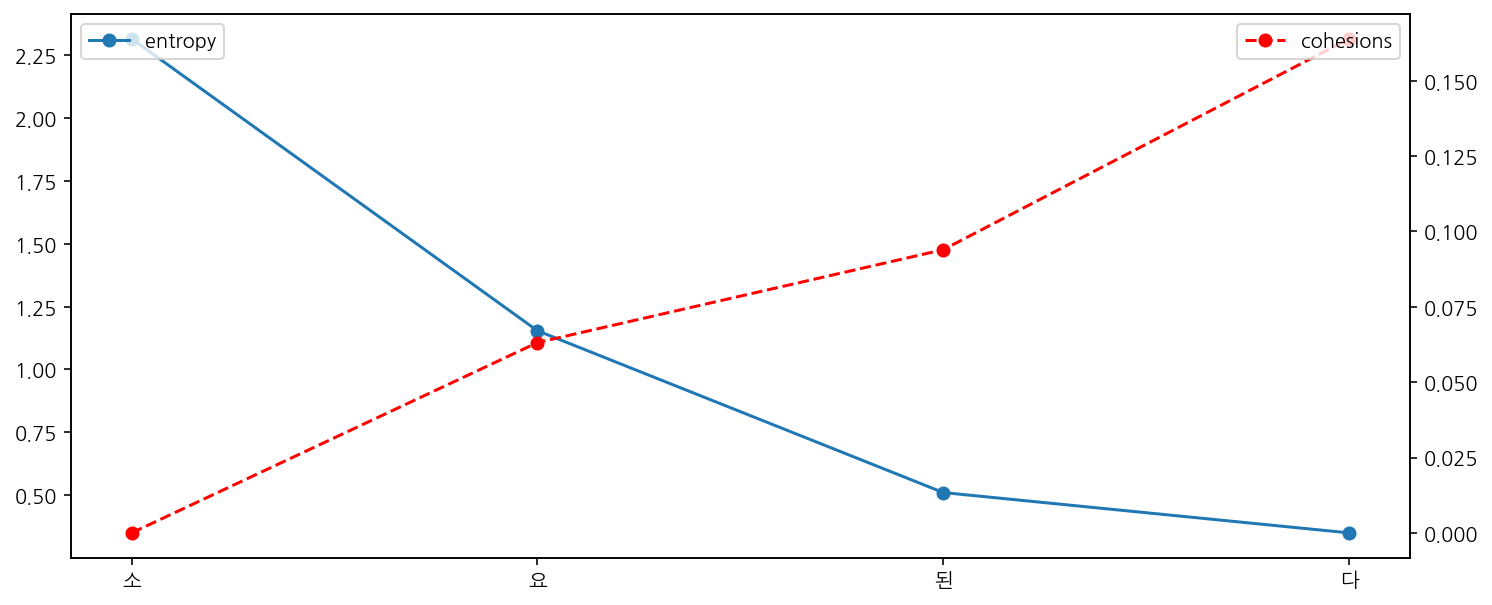

,char,entropy,cohesion,frequency,word,diffs_entropy,diffs_cohesion
0,소,2.316421,0.000000,9900,▁소,0.000000,0.063148
1,요,1.153912,0.063148,69,▁소요,-1.162509,0.030822
2,된,0.509782,0.093970,16,▁소요된,-0.644130,0.069994
3,다,0.349255,0.163964,14,▁소요된다,-0.160527,0.000000


time: 207 ms (started: 2022-11-15 10:55:47 +00:00)


In [56]:
word = "소요된다"
print(bet.tokenize(word))
bet.plot_local_entropy(word)
results = bet.show_local_entropy(word)
results

['▁아프리', '카를']


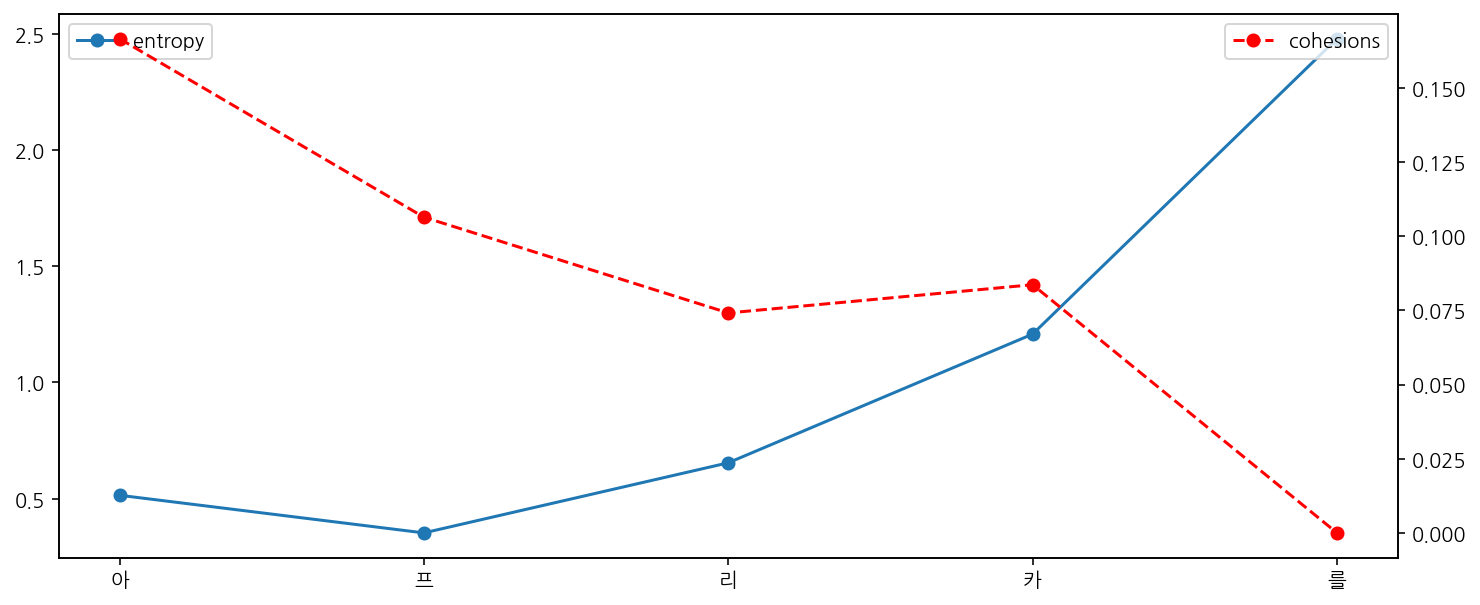

,char,entropy,cohesion,frequency,word,diffs_entropy,diffs_cohesion
0,아,0.514498,0.166574,6,아프리카를▁,0.161866,0.060157
1,프,0.352632,0.106416,6,프리카를▁,-0.301614,0.032275
2,리,0.654246,0.074141,18,리카를▁,-0.553715,-0.009508
3,카,1.207960,0.083649,171,카를▁,-1.271125,0.083649
4,를,2.479085,0.000000,42342,를▁,0.000000,0.000000


time: 192 ms (started: 2022-11-15 10:49:32 +00:00)


In [26]:
print(bet.tokenize(word, direction="backward"))
bet.plot_local_entropy(word, direction="backward")
results = bet.show_local_entropy(word, direction="backward")
results